In [ ]:
pip install opencv-python

In [ ]:
    local_zip = '/tmp/dataset.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('/tmp')
    zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import random
import pickle
import zipfile


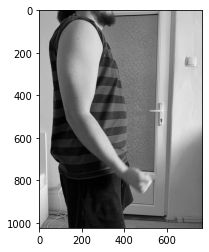

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

DATADIR = '/tmp/dataset'
CATEGORIES = ['good', 'bad']

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break


In [ ]:
print(img_array.shape)

(1024, 768)


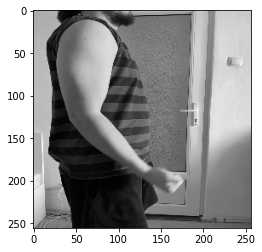

In [ ]:
IMG_SIZE= 256
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [ ]:
training_data = []

def create_train_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_data.append([new_array, class_num])

create_train_data()

In [ ]:
print(len(training_data))

132


In [ ]:
random.shuffle(training_data)

In [ ]:
for sample in training_data:
  print(sample[1])

In [ ]:
x = []
y = []

for feature, label in training_data:
  x.append(feature)
  y.append(label)

x = np.array(x).reshape(-1, IMG_SIZE,IMG_SIZE,1)
x= x /255

y= np.array(y)

In [ ]:

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x,y,batch_size=12,validation_split=0.2)


9/9 [==============================] - 14s 2s/step - loss: 6.7651 - accuracy: 0.7286 - val_loss: 0.0266 - val_accuracy: 1.0000
